In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("./SOCR-HeightWeight.csv")
df.drop(['Index'], axis=1, inplace=True)

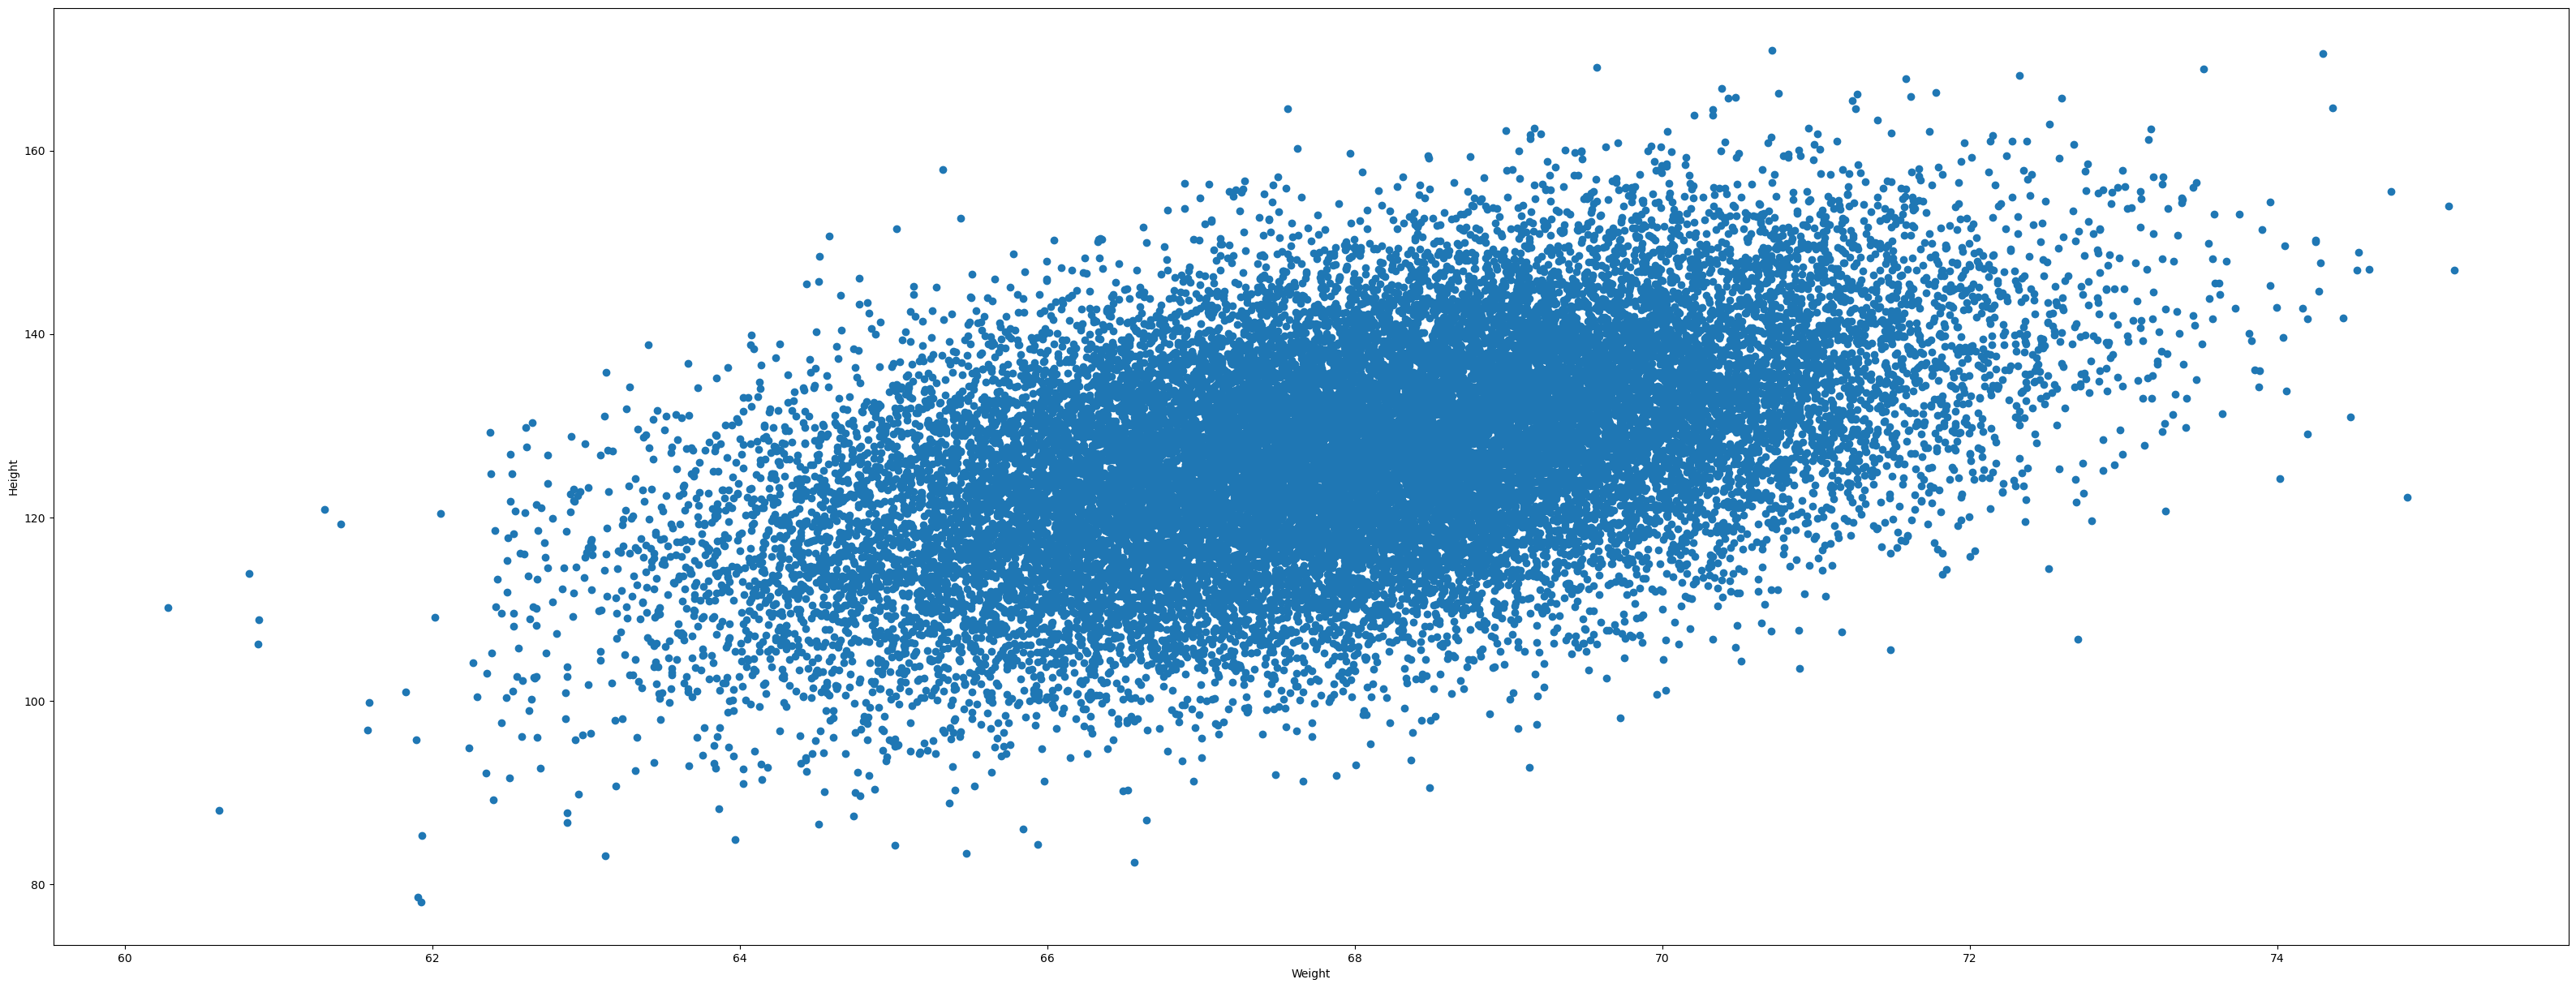

In [54]:
plt.figure(figsize=(40, 15))
plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'])
plt.ylabel("Height")
plt.xlabel("Weight")

plt.savefig('sample_plot.jpg')
plt.show()

# Data Cleaning

In [6]:
df.isna().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [8]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


# Exploratiry Data Analysis

<AxesSubplot: >

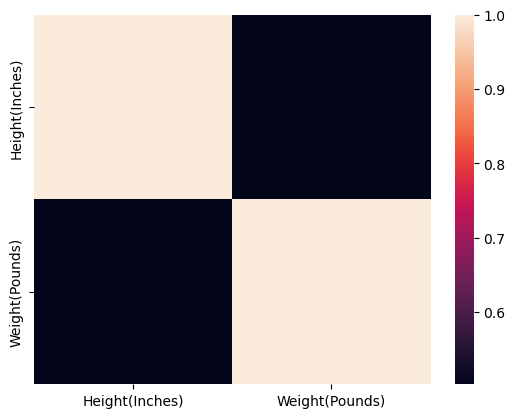

In [9]:
sns.heatmap(df.corr())

### Convert Pounds into KG

In [10]:
df["Weight(KGs)"] = df["Weight(Pounds)"] * .45
df.head()

,Height(Inches),Weight(Pounds),Weight(KGs)
0,65.78331,112.9925,50.846625
1,71.51521,136.4873,61.419285
2,69.39874,153.0269,68.862105
3,68.21660,142.3354,64.050930
4,67.78781,144.2971,64.933695


<AxesSubplot: xlabel='Weight(KGs)', ylabel='Count'>

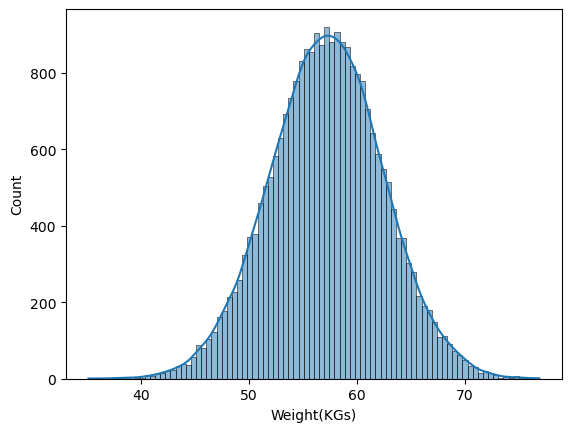

In [11]:
# visualize 
import seaborn as sns 
sns.histplot(data = df, x = 'Weight(KGs)', kde = True)

<AxesSubplot: xlabel='Weight(KGs)'>

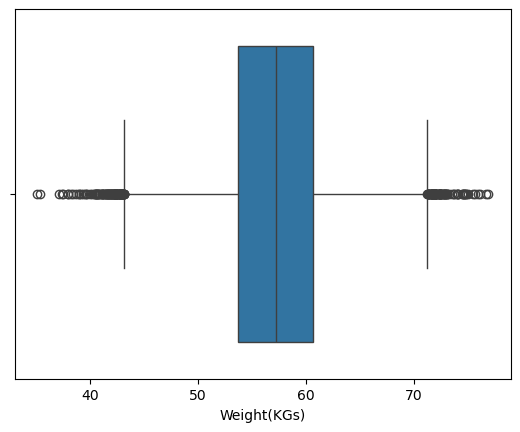

In [12]:
sns.boxplot(data = df, x = 'Weight(KGs)')

In [13]:
df['Weight(KGs)'].mean()

57.18573952236

In [14]:
standard_deviation = df['Weight(KGs)'].std()
standard_deviation

5.247403903621946

In [15]:
mean = df['Weight(KGs)'].mean()
mean

57.18573952236

In [16]:
lower_cut, upper_cut = mean -2 * standard_deviation , mean +2 * standard_deviation
df_clean = df[(df['Weight(KGs)'] > lower_cut) & (df['Weight(KGs)'] < upper_cut)]
df_clean.head()

,Height(Inches),Weight(Pounds),Weight(KGs)
0,65.78331,112.9925,50.846625
1,71.51521,136.4873,61.419285
3,68.21660,142.3354,64.050930
4,67.78781,144.2971,64.933695
5,68.69784,123.3024,55.486080


In [17]:
df_clean.shape

(23821, 3)

<AxesSubplot: xlabel='Weight(KGs)', ylabel='Count'>

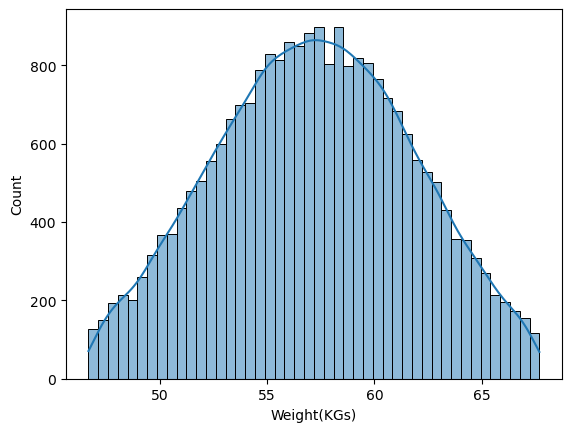

In [18]:
sns.histplot(data = df_clean, x = 'Weight(KGs)', kde = True)

In [19]:
# outlier removal using zscore 
df['zscore'] = (df['Weight(KGs)'] - df['Weight(KGs)'].mean()) / standard_deviation

In [24]:
df_clean2 = df[(df.zscore > -2) & (df.zscore < 2)]
df_clean2.shape

(23821, 4)

<AxesSubplot: xlabel='Weight(KGs)'>

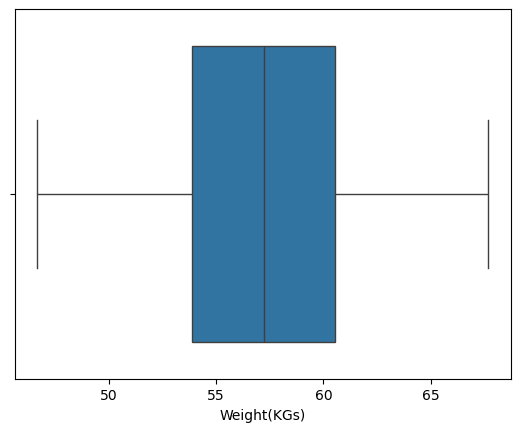

In [25]:
sns.boxplot(data = df_clean2, x='Weight(KGs)')

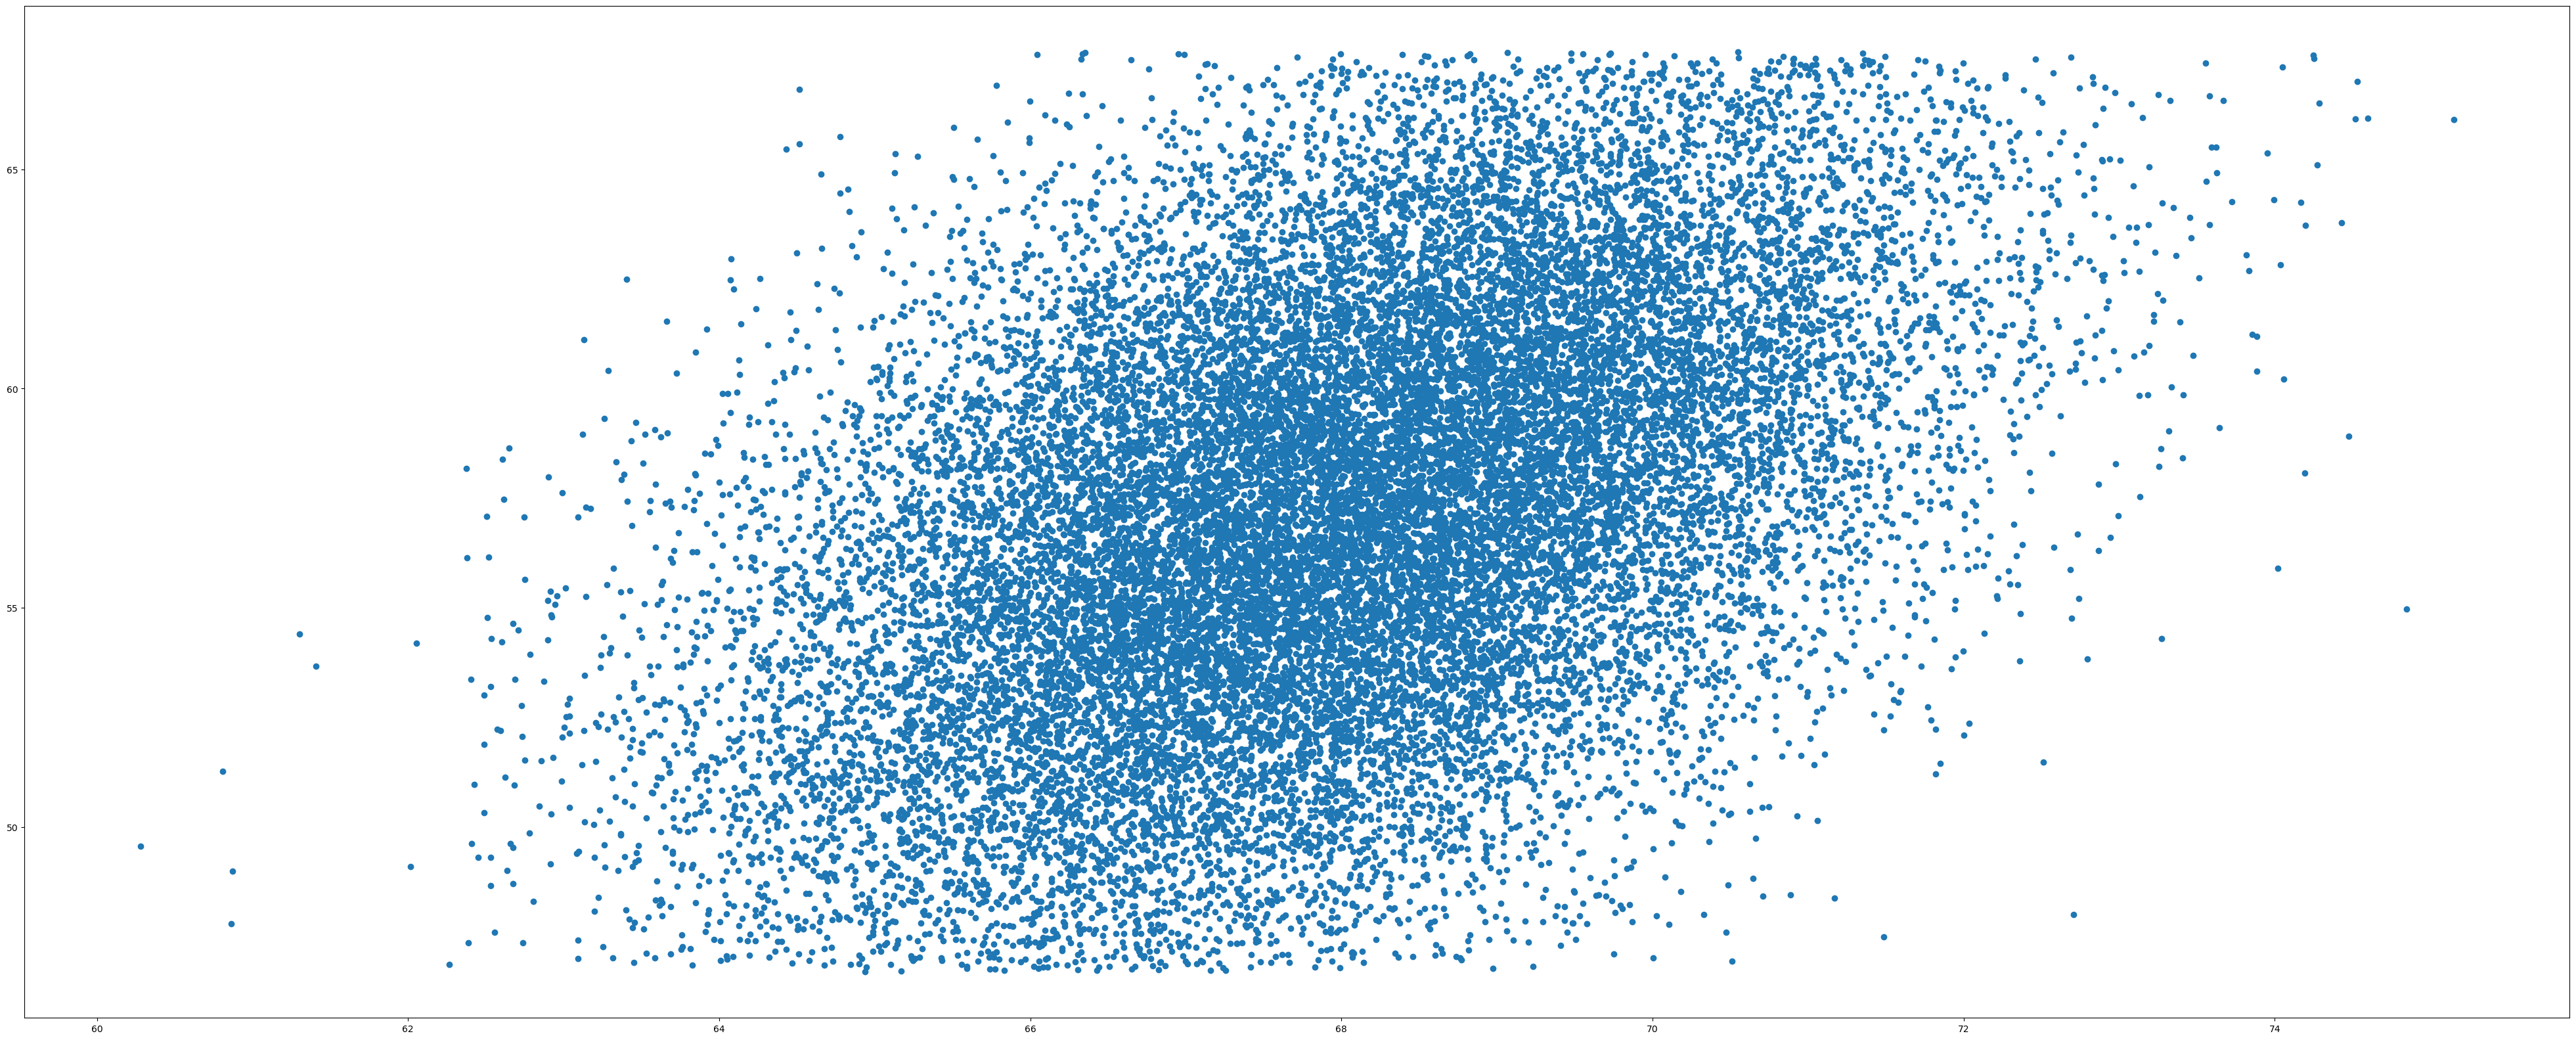

In [28]:
plt.figure(figsize=(50,20))
plt.scatter(df_clean2['Height(Inches)'], df_clean2['Weight(KGs)'])

<AxesSubplot: xlabel='Height(Inches)', ylabel='Count'>

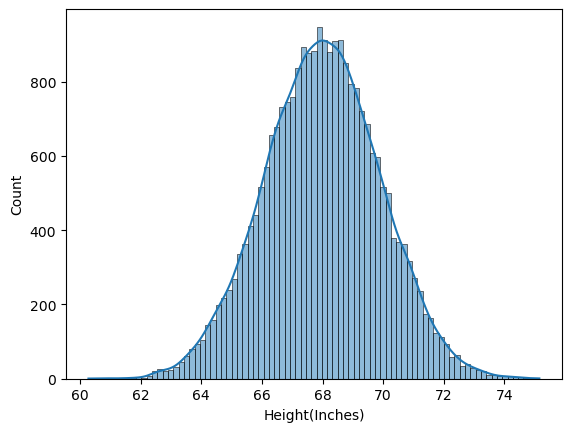

In [35]:
sns.histplot(data = df, x = 'Height(Inches)', kde = True)

<AxesSubplot: xlabel='Height(Inches)'>

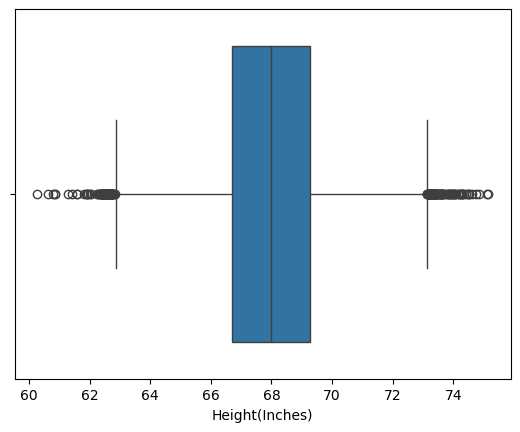

In [36]:
sns.boxplot(data = df, x='Height(Inches)')

In [42]:
mean_h = df['Height(Inches)'].mean()
mean_h

67.99311359679999

In [43]:
std_h = df['Height(Inches)'].std()
std_h

1.901678771205604

In [44]:
lower_cut1, upper_cut1 = mean_h -2 * std , mean_h +2 * std
df_clean_h = df[(df['Height(Inches)'] > lower_cut1) & (df['Height(Inches)'] < upper_cut1)]
df_clean_h.head()

,Height(Inches),Weight(Pounds),Weight(KGs),zscore
0,65.78331,112.9925,50.846625,-1.208048
1,71.51521,136.4873,61.419285,0.806789
2,69.39874,153.0269,68.862105,2.225170
3,68.21660,142.3354,64.050930,1.308302
4,67.78781,144.2971,64.933695,1.476531


In [29]:
df_clean2

,Height(Inches),Weight(Pounds),Weight(KGs),zscore
0,65.78331,112.9925,50.846625,-1.208048
1,71.51521,136.4873,61.419285,0.806789
3,68.21660,142.3354,64.050930,1.308302
4,67.78781,144.2971,64.933695,1.476531
5,68.69784,123.3024,55.486080,-0.323905
...,...,...,...,...
24995,69.50215,118.0312,53.114040,-0.775946
24996,64.54826,120.1932,54.086940,-0.590540
24997,64.69855,118.2655,53.219475,-0.755853
24998,67.52918,132.2682,59.520690,0.444973


<AxesSubplot: xlabel='Height(Inches)', ylabel='Count'>

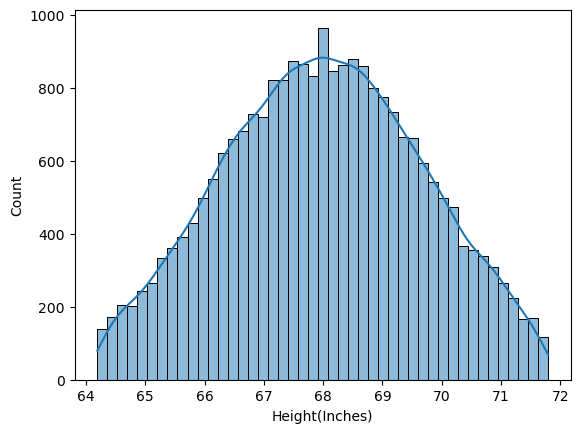

In [45]:
sns.histplot(data = df_clean_h, x = 'Height(Inches)', kde = True)

In [46]:
# outlier removal using zscore 
df['zscore_h'] = (df['Height(Inches)'] - df['Height(Inches)'].mean()) / std_h
df

,Height(Inches),Weight(Pounds),Weight(KGs),zscore,zscore_h
0,65.78331,112.9925,50.846625,-1.208048,-1.162028
1,71.51521,136.4873,61.419285,0.806789,1.852099
2,69.39874,153.0269,68.862105,2.225170,0.739150
3,68.21660,142.3354,64.050930,1.308302,0.117521
4,67.78781,144.2971,64.933695,1.476531,-0.107959
...,...,...,...,...,...
24995,69.50215,118.0312,53.114040,-0.775946,0.793529
24996,64.54826,120.1932,54.086940,-0.590540,-1.811480
24997,64.69855,118.2655,53.219475,-0.755853,-1.732450
24998,67.52918,132.2682,59.520690,0.444973,-0.243960


In [47]:
df_clean2_h = df[(df.zscore_h > -2) & (df.zscore_h < 2)]
df_clean2_h.shape

(23865, 5)

<AxesSubplot: xlabel='Height(Inches)'>

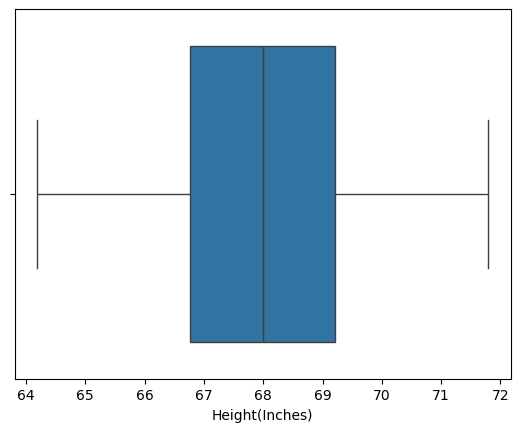

In [48]:
sns.boxplot(data = df_clean2_h, x='Height(Inches)')

In [49]:
df_clean2.shape, df_clean2_h.shape

((23821, 4), (23865, 5))

In [55]:
df_clean2

,Height(Inches),Weight(Pounds),Weight(KGs),zscore
0,65.78331,112.9925,50.846625,-1.208048
1,71.51521,136.4873,61.419285,0.806789
3,68.21660,142.3354,64.050930,1.308302
4,67.78781,144.2971,64.933695,1.476531
5,68.69784,123.3024,55.486080,-0.323905
...,...,...,...,...
24995,69.50215,118.0312,53.114040,-0.775946
24996,64.54826,120.1932,54.086940,-0.590540
24997,64.69855,118.2655,53.219475,-0.755853
24998,67.52918,132.2682,59.520690,0.444973


In [57]:
X = df_clean2[['Weight(KGs)']]
y = df_clean2['Height(Inches)']


In [58]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [59]:
#  Transforming my data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled, X_test_scaled.shape

(array([[-0.23899731],
        [ 0.95383745],
        [-1.76416674],
        ...,
        [ 1.40498306],
        [ 1.19357149],
        [ 0.66065126]]),
 (8338, 1))

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [69]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test_scaled)

In [71]:
y_pred

array([69.14085662, 67.68453579, 67.06280103, ..., 69.57928489,
       66.94009976, 67.36740033])

In [72]:
from sklearn.metrics import mean_absolute_error, r2_score

In [73]:
mae = mean_absolute_error(y_test, y_pred)
print("MEA:", mae)

MEA: 1.2988264144607342


In [74]:
score = r2_score(y_test, y_pred)
print(score)

0.20603388926177968


In [75]:
residuals = y_test - y_pred
print(residuals)

6787    -1.105257
9847     0.303654
14231   -0.630581
6077    -2.234207
4982    -0.629194
           ...   
22110   -0.457763
18837   -0.671372
10371   -1.056145
1884    -0.367280
10773    0.842700
Name: Height(Inches), Length: 8338, dtype: float64


#### Residuals Plot

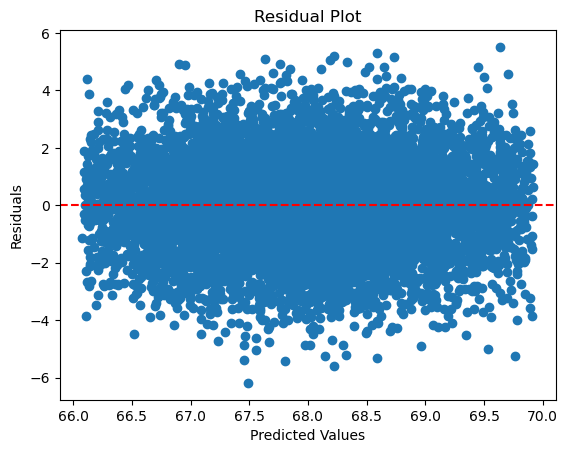

In [79]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig("ResidualPlot.png")
plt.show()

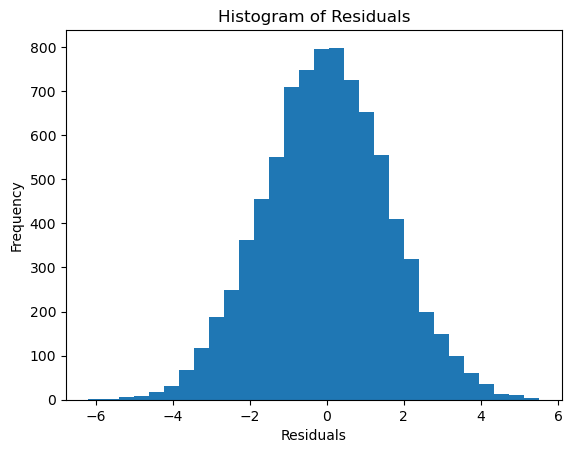

In [77]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

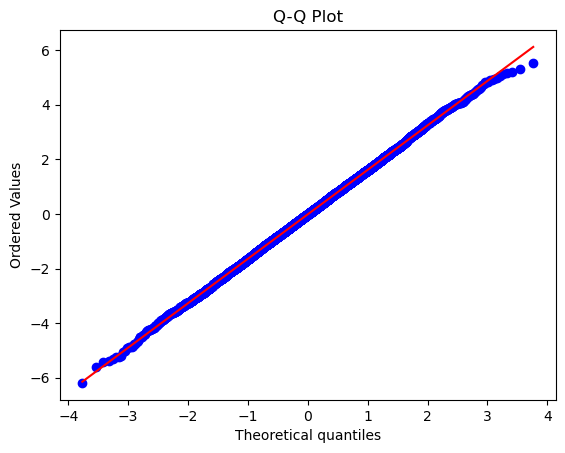

In [78]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [80]:
lr.score(X_test_scaled, y_test)

0.20603388926177968

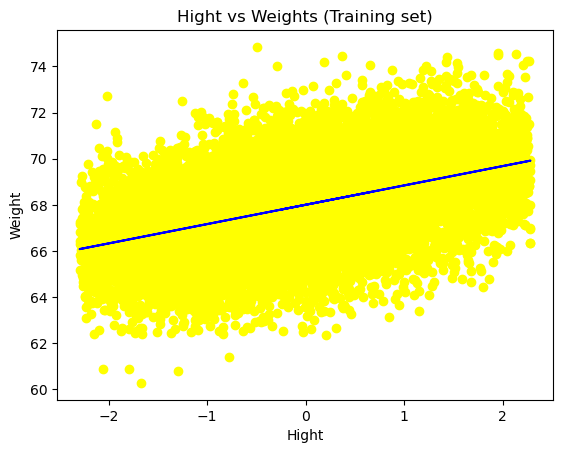

In [82]:
# Visualising the Training set results
plt.scatter(X_train_scaled, y_train, color = 'Yellow')
plt.plot(X_train_scaled, lr.predict(X_train_scaled), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

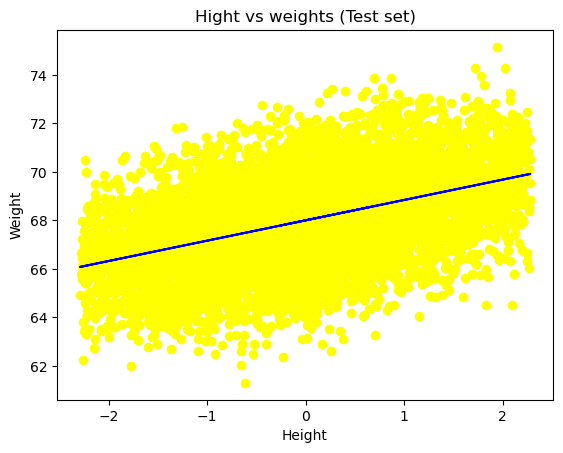

In [83]:
# Visualising the Test set results
plt.scatter(X_test_scaled, y_test, color = 'Yellow')
plt.plot(X_train_scaled, lr.predict(X_train_scaled), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [114]:
# Finding outliers

/tmp/ipykernel_6259/1814237121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height(Inches)'])
/tmp/ipykernel_6259/1814237121.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight(Pounds)'])


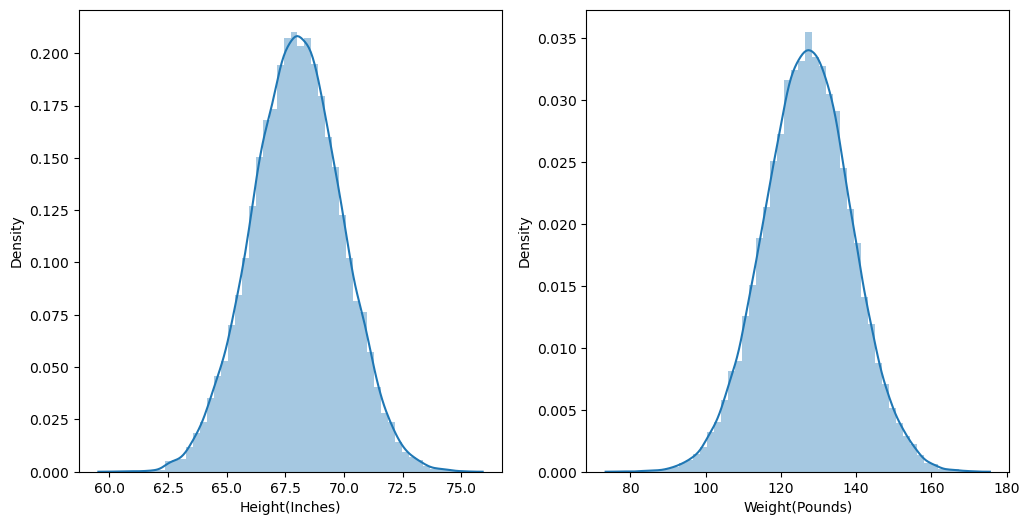

In [115]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['Height(Inches)'])
plt.subplot(1,2,2)
sns.distplot(df['Weight(Pounds)'])
plt.show()

In [116]:
df['Weight(Pounds)'].skew()

-0.026031345790611

In [117]:
#**Finding the bounadray values**
print('Heigth allowed=',df['Weight(Pounds)'].mean()+3*df['Weight(Pounds)'].std())
print('Lowest allowed=',df['Weight(Pounds)'].mean()-3*df['Weight(Pounds)'].std())

Heigth allowed= 162.06211385161288
Lowest allowed= 92.09672846998714


In [118]:
#find the outlier 
df[(df['Weight(Pounds)']>162.06 )|( df['Weight(Pounds)']<92.096)]

,Height(Inches),Weight(Pounds)
249,65.93895,84.35980
367,72.32489,168.22900
446,69.16807,162.41090
727,63.12550,83.08527
1332,72.52115,162.87370
...,...,...
21101,65.84174,85.98927
22282,64.14250,91.37972
22738,62.87593,87.80417
22945,61.92639,78.01476


In [119]:
#Trimming

new_df=df[(df['Weight(Pounds)']<162.06) & (df['Weight(Pounds)']>92.096)]


In [125]:
new_df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


### Outliers with Z-score

In [122]:
# Calculating the Zscore
df['Z_score']=(df['Weight(Pounds)']-df['Weight(Pounds)'].mean())/df['Weight(Pounds)'].std()
df

,Height(Inches),Weight(Pounds),Z_score
0,65.78331,112.9925,-1.208048
1,71.51521,136.4873,0.806789
2,69.39874,153.0269,2.225170
3,68.21660,142.3354,1.308302
4,67.78781,144.2971,1.476531
...,...,...,...
24995,69.50215,118.0312,-0.775946
24996,64.54826,120.1932,-0.590540
24997,64.69855,118.2655,-0.755853
24998,67.52918,132.2682,0.444973


In [123]:
df[(df['Z_score']>3)|( df['Z_score']<-3)]

,Height(Inches),Weight(Pounds),Z_score
249,65.93895,84.35980,-3.663493
367,72.32489,168.22900,3.528852
446,69.16807,162.41090,3.029911
727,63.12550,83.08527,-3.772793
1332,72.52115,162.87370,3.069599
...,...,...,...
21101,65.84174,85.98927,-3.523755
22282,64.14250,91.37972,-3.061488
22738,62.87593,87.80417,-3.368116
22945,61.92639,78.01476,-4.207623


In [124]:
#trimming
df_zsco=df[(df['Z_score']<3)&( df['Z_score']>-3)]
df_zsco.shape

(24931, 3)

In [21]:
# Devide dataset into independent and dependent feature
X = df_clean2[['Weight(KGs)']]
y = df_clean2['Height(Inches)']

In [22]:
X, y

(       Weight(KGs)
 0        50.846625
 1        61.419285
 3        64.050930
 4        64.933695
 5        55.486080
 ...            ...
 24995    53.114040
 24996    54.086940
 24997    53.219475
 24998    59.520690
 24999    56.193390
 
 [23821 rows x 1 columns],
 0        65.78331
 1        71.51521
 3        68.21660
 4        67.78781
 5        68.69784
            ...   
 24995    69.50215
 24996    64.54826
 24997    64.69855
 24998    67.52918
 24999    68.87761
 Name: Height(Inches), Length: 23821, dtype: float64)

### X_train is the input feature and y_train is output feature for the training 
### X_test is input feature and y_test is out put feature for the testing

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Standard Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_16455/160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

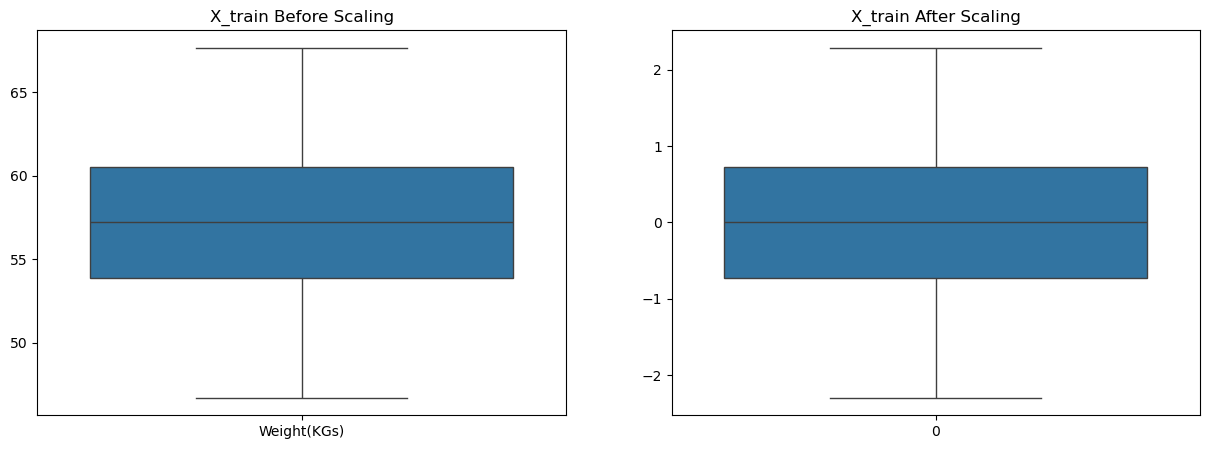

In [26]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [1]:
plt.figure(figsize=(30, 10))
plt.scatter(X_train_scaled, y_train)

NameError: name 'plt' is not defined

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
lr.intercept_

67.99690537678421

In [31]:
lr.coef_

array([0.83182134])

#### Prediction of Train Data
<u>
    
<li>
    Predicted height output = intercept + coef_(Weight)
</li>
<li>
    y_prred_train = 67.99 + 0.95*(X_train)
</li>
</ul>

#### Prediction of Test Data
<u>
    
<li>
    Predicted height output = intercept + coef_(Weight)
</li>
<li>
    y_prred_train = 67.99 + 0.95*(X_test)
</li>
</ul>

In [32]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([69.12647242, 67.68123821, 67.06423658, ..., 68.06775928,
       67.23420547, 67.12637487])

In [33]:
y_pred, y_test

(array([69.12647242, 67.68123821, 67.06423658, ..., 68.06775928,
        67.23420547, 67.12637487]),
 6787     68.03560
 9847     67.98819
 14231    66.43222
 6077     65.22518
 4982     66.20453
            ...   
 12655    64.82189
 2421     67.20628
 22722    66.60069
 20178    68.39965
 20765    66.63549
 Name: Height(Inches), Length: 4765, dtype: float64)

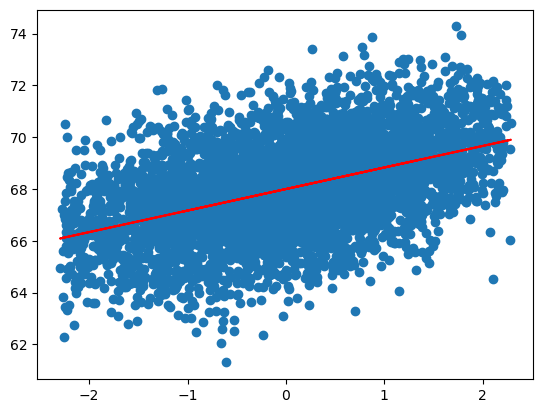

In [34]:
# Best Fit line for prediction data
plt.scatter(X_test_scaled, y_test)
plt.plot(X_test_scaled, lr.predict(X_test_scaled), 'r')

## Performance Metrics

Mean Absolute Error : 1.301932826806482
Mean Squared Error : 2.6378190894725235
Root Mean Squared Error : 1.6241364134433178
R2 Score : 0.2144963623244105


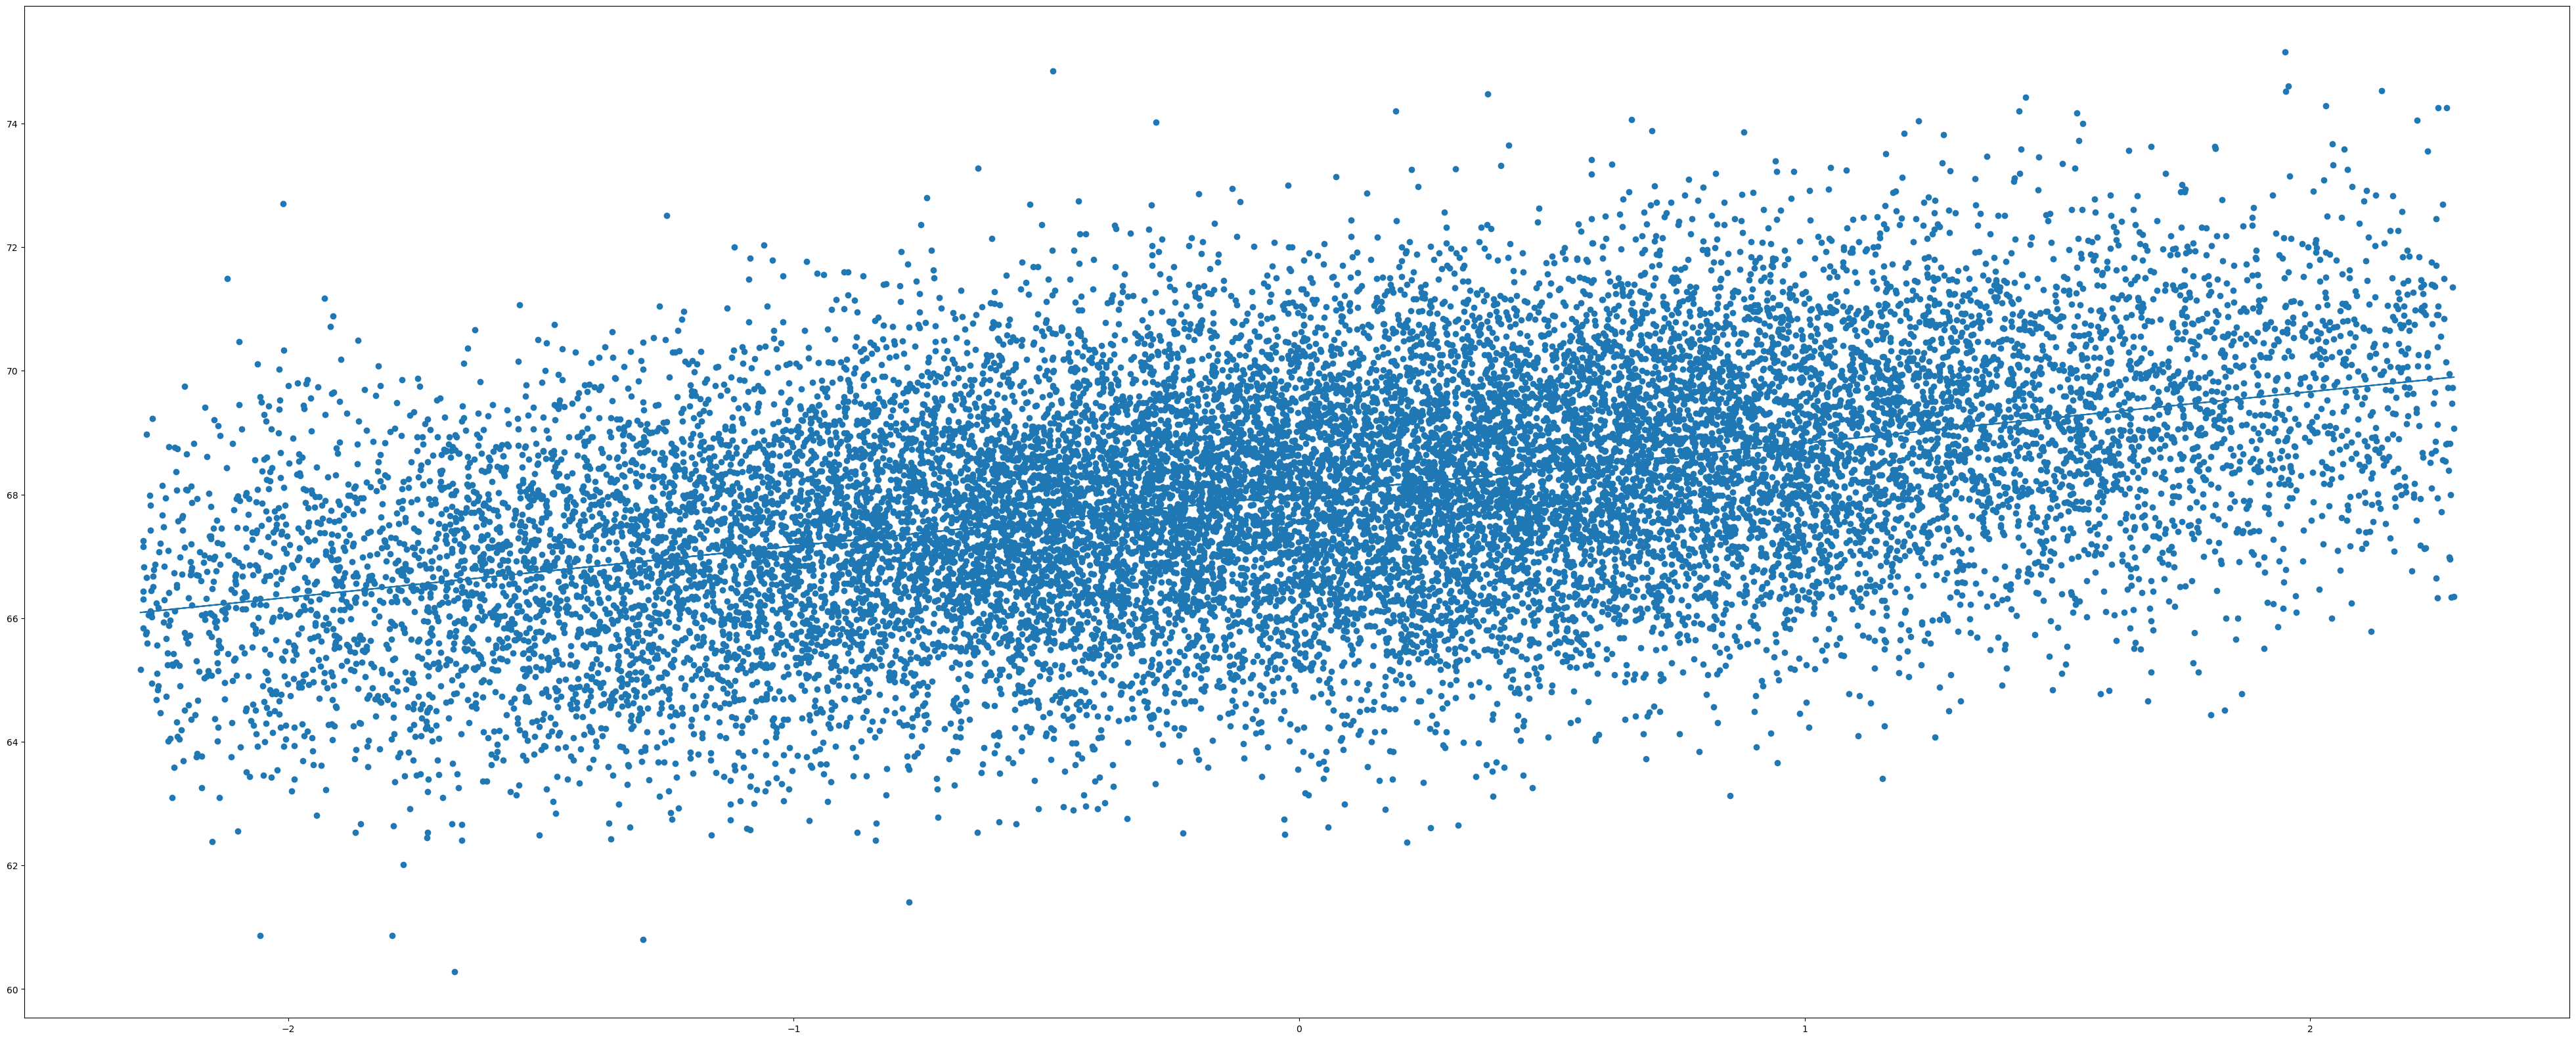

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("R2 Score :", score)
plt.figure(figsize=(50,20))
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, lr.predict(X_train_scaled))

In [144]:
lr.score(X_test_scaled, y_pred) # it's Overfitting

1.0

# Ridge Regression

In [145]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_score = r2_score(y_test, ridge_pred)

print("Mean Absolute Error :", ridge_mae)
print("Mean squared Error :", ridge_mse)
print("Means MSE :", np.sqrt(ridge_mse))
print("Score :", ridge_score)

Mean Absolute Error : 1.310317616463987
Mean squared Error : 2.693645970329079
Means MSE : 1.6412330639884998
Score : 0.2422596665756387


# Ridge Regression CV

Mean Absolute Error For RidgeCV: 1.3103095809542817
Mean Squared Error For RidgeCV: 2.6936127582212177
Root Mean Squared Error For RidgeCV: 1.641234195939625
R2 Score For RidgeCV: 0.24226900936008833


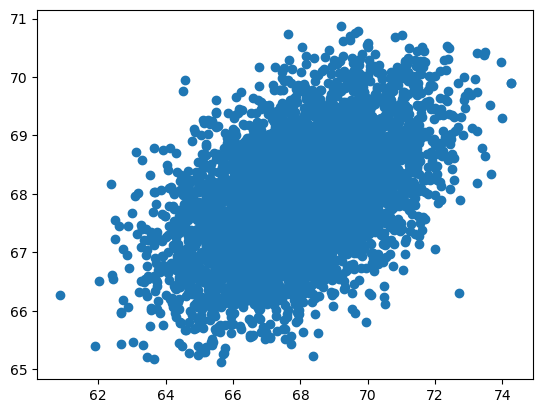

In [146]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled, y_train)
ridgeCV_pred = ridgeCV.predict(X_test_scaled)
plt.scatter(y_test, ridgeCV_pred)
ridgeCV_mae = mean_absolute_error(y_test, ridgeCV_pred)
ridgeCV_mse = mean_squared_error(y_test, ridgeCV_pred)
ridgeCV_rmse = np.sqrt(mse)
print("Mean Absolute Error For RidgeCV:", ridgeCV_mae)
print("Mean Squared Error For RidgeCV:", ridgeCV_mse)
print("Root Mean Squared Error For RidgeCV:", ridgeCV_rmse)
# Check Score
ridgeCV_r2_score = r2_score(y_test, ridgeCV_pred)
print("R2 Score For RidgeCV:", ridgeCV_r2_score)